![](images/EscUpmPolit_p.gif "UPM")

# Reto1

URL del reto: https://www.kaggle.com/c/loan-approval-prediction-texas

This challenge consists in an automatic learning competition. The task is to use the techniques learned in class, applying them to a competition with the aim of obtaining the best model. To this end, a dataset of SME enterprises that have applied for a loan is provided, and their mission will be to build a classifier that determines whether the loan should be granted or denied.

In this challenge the students must take the role of a bank, and formulate the following question: As a representative of the bank, should I grant a loan to a particular small business (Company X)? Why or why not? The student makes this decision by assessing a loan's risk.

In [144]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline

# Campos de información

* **id** # Text # Identifier of the data instance
* **LoanNr_ChkDgt** # Text # Identifier of the loan petition
* **Name** # Text # Borrower name
* **City** # Text # Borrower city
* **State** # Text # Borrower state
* **Bank** # Text # Bank name
* **BankState** # Text # Bank state
* **ApprovalDate** # Date/Time # Date SBA commitment issued
* **ApprovalFY** # Text # Fiscal year of commitment
* **NoEmp** # Number # Number of business employees
* **NewExist** # Text # 1 = Existing business, 2 = New business
* **CreateJob** # Number # Number of jobs created
* **RetainedJob** # Number # Number of jobs retained
* **FranchiseCode** # Text # Franchise code, (00000 or 00001) = No franchise
* **UrbanRural** # Text # 1 = Urban, 2 = rural, 0 = undefined
* **RevLineCr** # Text # Revolving line of credit: Y = Yes, N = No
* **LowDoc** # Text # LowDoc Loan Program: Y = Yes, N = No
* **ChgOffDate** # Date/Time # The date when a loan is declared to be in default
* **DisbursementDate** # Date/Time # Disbursement date
* **DisbursementGross** # Currency # Amount disbursed
* **BalanceGross** # Currency # Gross amount outstanding
* **Accept** # Text # Loan approval status. 0 = not approved, 1 = approved

# Carga de datos

In [145]:
url = "data/train.csv"
df = pd.read_csv(url)
df

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,d30838cf806,6340864010,QUALITY DOCUMENT SOLUTIONS INC,ODESSA,TX,WELLS FARGO BANK NATL ASSOC,SD,22-May-03,2003,10,...,10,1,1,0,N,NaN,30-Jun-03,"$150,000.00",$0.00,1
1,14560b856a6,1670916004,ATLANTIC INDUSTRIAL WOOD PRODU,KELLER,TX,WELLS FARGO BANK NATL ASSOC,CA,7-Apr-06,2006,1,...,1,1,1,Y,N,NaN,31-Jul-06,"$250,000.00",$0.00,1
2,051e5c3899f,7568313003,C J TREEHOUSE INC.,EL PASO,TX,BANK OF AMERICA NATL ASSOC,TX,12-Sep-94,1994,5,...,0,1,0,N,Y,NaN,31-Oct-94,"$53,000.00",$0.00,1
3,eb223b05ea8,4585814005,WINGSTOP,SAN ANTONIO,TX,COMPASS BANK,AL,18-Jun-01,2001,1,...,1,89769,1,0,N,NaN,31-Aug-01,"$170,000.00",$0.00,1
4,c80c89ac964,2003866003,H & H MACHINE & SUPPLY INC,ODESSA,TX,SOUTHWEST BANK,TX,12-May-06,2006,5,...,5,1,1,0,N,NaN,31-May-06,"$121,000.00",$0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49315,7bc068859e5,4999154008,SUPREME BAKERY INC,EL PASO,TX,JPMORGAN CHASE BANK NATL ASSOC,IL,23-Oct-01,2002,13,...,13,1,0,0,N,NaN,31-Mar-02,"$63,000.00",$0.00,1
49316,1f0420db159,1401875000,"Yunmi Sushi, Corp.",HOUSTON,TX,JPMORGAN CHASE BANK NATL ASSOC,IL,4-Aug-05,2005,1,...,1,0,1,Y,N,NaN,30-Sep-05,"$25,000.00",$0.00,1
49317,7f4cbcda5f5,5823093008,SOUTHSIDE ACE HARDWARE,GRAND PRAIRIE,TX,BANK OF THE WEST,TX,3-Aug-93,1993,8,...,0,1560,0,N,N,NaN,31-Jan-94,"$200,000.00",$0.00,1
49318,4dcd80b2311,2713645005,"THE FORSBERG LAW FIRM, P.C.",MONTGOMERY,TX,CAPITAL ONE NATL ASSOC,VA,21-Sep-07,2007,3,...,3,0,1,N,N,NaN,31-Oct-07,"$35,000.00",$0.00,1


# Evaluación de datos

## Evaluación general

Número de clases y de características

In [146]:
df.shape

(49320, 22)

Información sobre las columnas y sus tipos 

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49320 entries, 0 to 49319
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 49320 non-null  object 
 1   LoanNr_ChkDgt      49320 non-null  int64  
 2   Name               49319 non-null  object 
 3   City               49320 non-null  object 
 4   State              49320 non-null  object 
 5   Bank               49120 non-null  object 
 6   BankState          49120 non-null  object 
 7   ApprovalDate       49320 non-null  object 
 8   ApprovalFY         49320 non-null  object 
 9   NoEmp              49320 non-null  int64  
 10  NewExist           49313 non-null  float64
 11  CreateJob          49320 non-null  int64  
 12  RetainedJob        49320 non-null  int64  
 13  FranchiseCode      49320 non-null  int64  
 14  UrbanRural         49320 non-null  int64  
 15  RevLineCr          49031 non-null  object 
 16  LowDoc             491

Vemos que tenemos 14 columnas de tipo ***object*** (habrá que cambiarlos de tipo), 8 columnas de tipo numérico (7 de ***int64*** y 1 de ***float64***). 

In [148]:
# Estadísticas básicas de todas las columnas numéricas
df.describe()

,LoanNr_ChkDgt,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept
count,4.932000e+04,49320.000000,49313.000000,49320.000000,49320.000000,49320.000000,49320.000000,49320.000000
mean,4.941161e+09,10.794505,1.317361,9.871006,11.930211,3933.928062,0.658942,0.810929
std,2.530125e+09,44.645641,0.467497,262.815556,266.334776,15141.332203,0.595339,0.391569
min,1.000254e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.731376e+09,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,4.598009e+09,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,7.141562e+09,10.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,9.995563e+09,4000.000000,2.000000,8800.000000,9500.000000,92000.000000,2.000000,1.000000


Número de los valores desaparecidos

In [149]:
df.isnull().sum()

id                       0
LoanNr_ChkDgt            0
Name                     1
City                     0
State                    0
Bank                   200
BankState              200
ApprovalDate             0
ApprovalFY               0
NoEmp                    0
NewExist                 7
CreateJob                0
RetainedJob              0
FranchiseCode            0
UrbanRural               0
RevLineCr              289
LowDoc                 160
ChgOffDate           39749
DisbursementDate       126
DisbursementGross        0
BalanceGross             0
Accept                   0
dtype: int64

array([[<AxesSubplot:title={'center':'LoanNr_ChkDgt'}>,
        <AxesSubplot:title={'center':'NoEmp'}>,
        <AxesSubplot:title={'center':'NewExist'}>],
       [<AxesSubplot:title={'center':'CreateJob'}>,
        <AxesSubplot:title={'center':'RetainedJob'}>,
        <AxesSubplot:title={'center':'FranchiseCode'}>],
       [<AxesSubplot:title={'center':'UrbanRural'}>,
        <AxesSubplot:title={'center':'Accept'}>, <AxesSubplot:>]],
      dtype=object)

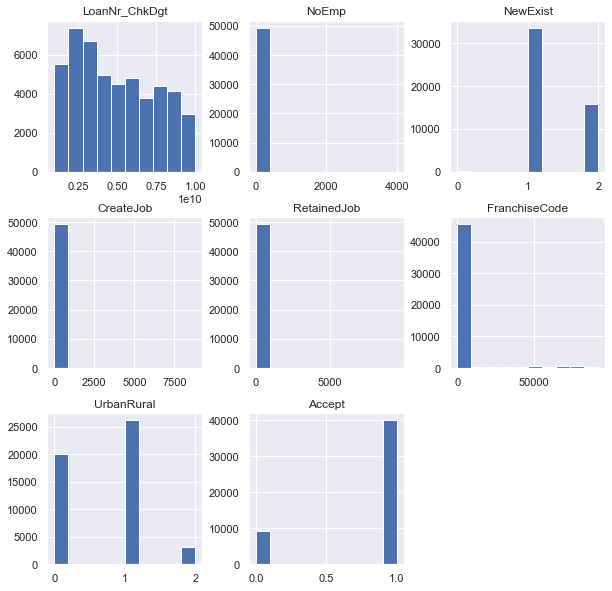

In [150]:
df.hist(figsize=(10,10))

## Columna id

Esta característica no aporta información ya que es un identificador

## Columna LoanNr_ChkDgt

Esta característica no aporta información ya que es un identificador

## Columna Name

In [151]:
df['Name']

0        QUALITY DOCUMENT SOLUTIONS INC
1        ATLANTIC INDUSTRIAL WOOD PRODU
2                    C J TREEHOUSE INC.
3                              WINGSTOP
4            H & H MACHINE & SUPPLY INC
                      ...              
49315                SUPREME BAKERY INC
49316                Yunmi Sushi, Corp.
49317            SOUTHSIDE ACE HARDWARE
49318       THE FORSBERG LAW FIRM, P.C.
49319    BOX BROTHERS ENTERPRISES, INC.
Name: Name, Length: 49320, dtype: object

In [152]:
df['Name'].describe()

count                     49319
unique                    44761
top       WEST TEXAS LEE CO INC
freq                         96
Name: Name, dtype: object

Esta caracteristica parece no aportar mucha información

## Columna City

Valores

In [153]:
df['City'].unique()

array(['ODESSA', 'KELLER', 'EL PASO', ..., 'GRAND PRAIRE', 'SPRINGN',
       'MILAM'], dtype=object)

Descripción de City

In [154]:
#df = pd.DictVectorizer(df, columns=['City'])
df['City'].describe()

count       49320
unique       1781
top       HOUSTON
freq         7136
Name: City, dtype: object

Vemos que tiene 1781 valores únicos de tipo object que habrá que convertirlos a enteros

Codificación de valores categóricos

Para evitar que hay orden en los diferentes valores se va a usar pd.get_dummies que convierte cada valor en una columna binaria

In [155]:
df_city = pd.get_dummies(df, columns=['City'])

## Columna State

Descripción de la columna

In [156]:
df['State']

0        TX
1        TX
2        TX
3        TX
4        TX
         ..
49315    TX
49316    TX
49317    TX
49318    TX
49319    TX
Name: State, Length: 49320, dtype: object

In [157]:
df['State'].describe()

count     49320
unique        1
top          TX
freq      49320
Name: State, dtype: object

Visualización de los valores de la columna State 

<AxesSubplot:>

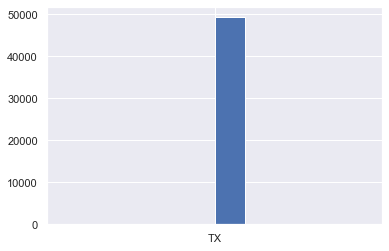

In [158]:
df['State'].hist()

Se puede observar que el valor de la columna State es siempre el mismo, por lo que se podría borrar la columna entera.

## Columna Bank

## Columna BankState

## Columna ApprovalDate

## Columna ApprovalFY

## Columna NoEmp

Descripción de la columna

In [159]:
df['NoEmp']

0        10
1         1
2         5
3         1
4         5
         ..
49315    13
49316     1
49317     8
49318     3
49319     7
Name: NoEmp, Length: 49320, dtype: int64

In [160]:
df['NoEmp'].describe()

count    49320.000000
mean        10.794505
std         44.645641
min          0.000000
25%          2.000000
50%          4.000000
75%         10.000000
max       4000.000000
Name: NoEmp, dtype: float64

Viusalización de la columna NoEmp

<AxesSubplot:>

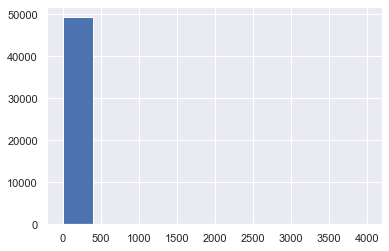

In [161]:
df['NoEmp'].hist()

## Columna NewExist

## Columna CreateJob

## Columna RetainedJob

## Columna FranchiseCode

## Columna UrbanRural

## Columna RevLineCr

## Columna LowDoc

## Columna ChgOffDate

La columa ChgOffDate tiene un 19.4% (9571/49320) de valores no nulos y un 80.6% (39749/49320) de valores nulos. De este hecho se saca que no se sería buena idea extrapolar los valores nulos de los no nulos, ya que los datos no nulos suponen menos de un 20%. Por tanto se podría eliminar la columna.

## Columna DisbursementDate

## Columna DisbursementGross

## Columna BalanceGross

Descripción de la columna

In [162]:
df['BalanceGross']

0        $0.00 
1        $0.00 
2        $0.00 
3        $0.00 
4        $0.00 
          ...  
49315    $0.00 
49316    $0.00 
49317    $0.00 
49318    $0.00 
49319    $0.00 
Name: BalanceGross, Length: 49320, dtype: object

In [163]:
df['BalanceGross'].describe()

count      49320
unique         1
top       $0.00 
freq       49320
Name: BalanceGross, dtype: object

Viusalización de la columna BalanceGross

<AxesSubplot:>

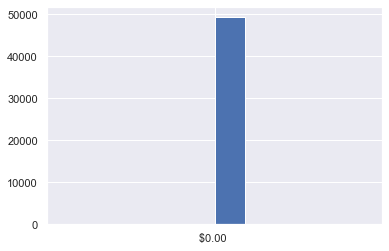

In [164]:
df['BalanceGross'].hist()

Se puede observar que el valor de la columna BalanceGross es siempre el mismo, para todos los emjemplos, por lo que se podría borrar la columna entera.

# Limpieza de datos

Duplicados

In [165]:
df.duplicated().any()

False

Eliminación de columnas

In [166]:
#df.drop(['BalanceGross', 'State','ChgOffDate','Name'], axis=1, inplace=True)